In [ ]:
# Import the class from my_functions.py
from my_functions.functions_data_linking import LoadData
from my_functions.functions_data_linking import DataProcessing
import pandas as pd

# Objective

The aim is to link the two data sources. The **business pattern data** is available geographically at the **county level**. 

The **total national distribution of occupations by industry** (NAICS, 4-digit) can be used to determine the number of occupations at the **county level**.


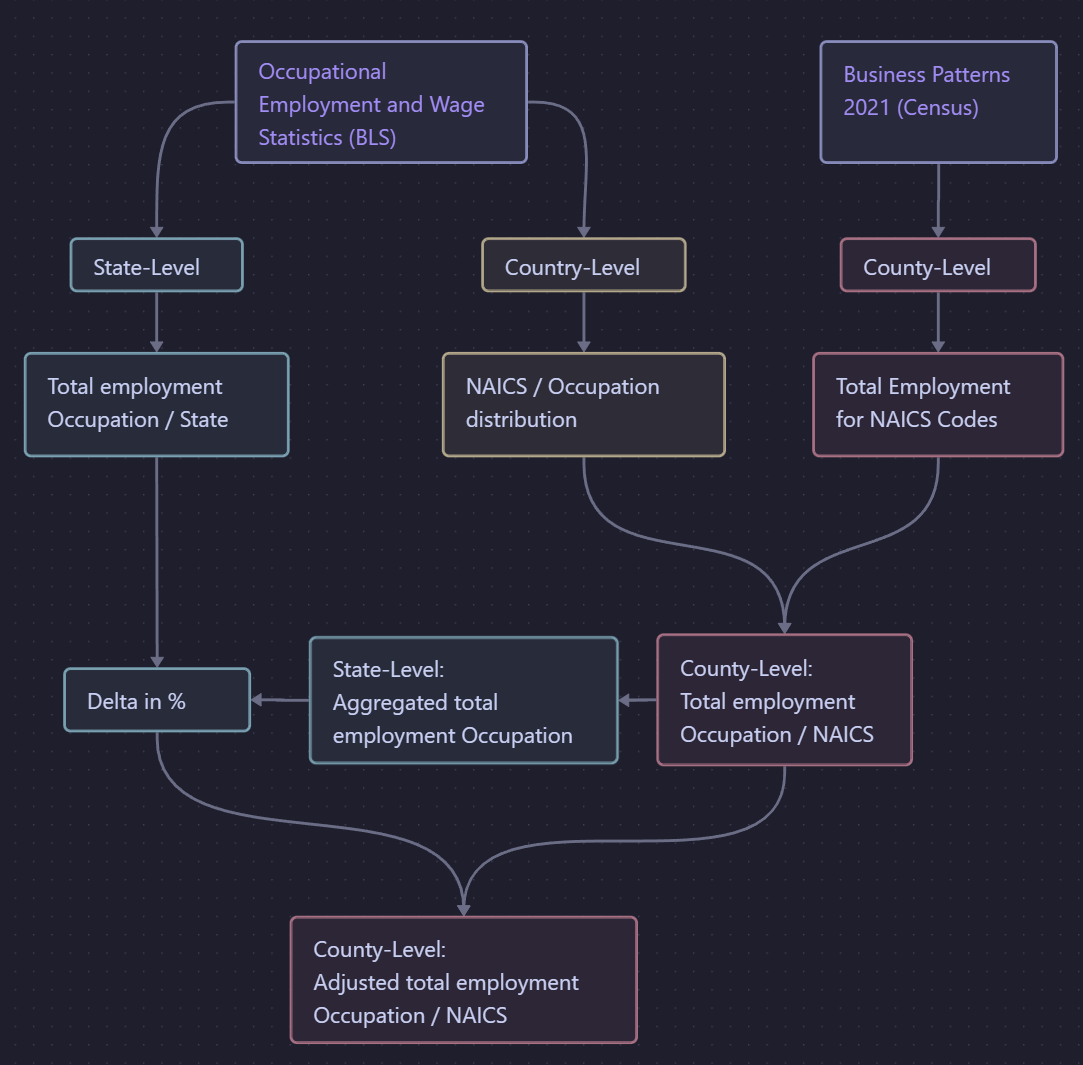


# Load data

In [ ]:
# Define file paths
business_pattern_path = 'data/original_data/txt/cbp21co.txt'
naics_path = 'data/original_data/txt/NAICS.txt'
occupation_path = 'data/original_data/xlsx/all_data_M_2022.xlsx'
occupation_prioritization_path = 'data/original_data/xlsx/occupation_master.xlsx'
indicator_path = 'data/original_data/xlsx/indicator_master.xlsx'
county_information_path = 'data/original_data/pkl/county_information.pkl'

In [ ]:
ld = LoadData(business_pattern_path, naics_path, county_information_path, occupation_path, occupation_prioritization_path, indicator_path)
dp = DataProcessing()

In [ ]:
# Load and process the Business Pattern data along with County information
#df_pattern, df_county = ld.load_business_pattern_data()

# Load and prepare the Occupation data
#df_occupation, filtered_occ_codes = ld.load_and_prepare_occupation_data()

In [ ]:
df_pattern = pd.read_pickle('data/processed_data/pkl/df_pattern.pickle')
df_occupation = pd.read_pickle('data/processed_data/pkl/df_occupation.pickle')
filtered_occ_codes = pd.read_pickle('data/processed_data/pkl/filtered_occ_codes.pickle')
df_county = pd.read_pickle('data/processed_data/pkl/df_county.pickle')

In [ ]:
df_pattern.head()

In [ ]:
df_county.head()

In [ ]:
df_occupation.head()

In [ ]:
filtered_occ_codes.head()

# Data processing

In [ ]:
#This function processes NAICS (North American Industry Classification System) codes by converting detailed 6-digit 
#codes into more generalized 4-digit codes, aggregating them based on predefined mappings, and updating their descriptions. 
#It generates and saves processed DataFrames for NAICS codes and occupations, creating overviews for each, which can be reused in further analysis. 
#The processed data includes consistent categorization and aggregated descriptions for easier interpretation and reporting.

#df_pattern_4d, naics_overview, occ_overview = dp.convert_naics_codes(df_pattern, df_occupation)

df_pattern_4d = pd.read_pickle('data/processed_data/pkl/df_pattern_4d.pickle')
naics_overview = pd.read_pickle('data/processed_data/pkl/naics_overview.pickle')
occ_overview = pd.read_pickle('data/processed_data/pkl/occ_overview.pickle')
# Anzeigen der ersten Zeilen des Ergebnisses
df_pattern_4d.head()

In [ ]:
# This function filters a DataFrame (df_pattern_4d) to include only rows with NAICS codes 
# that intersect with the NAICS codes present in another DataFrame (pivot_table_percent). 
# It calculates unique and missing NAICS codes from both datasets, identifies their intersection, 
# and uses it to filter the original DataFrame. The filtered data is saved for further use, 
# ensuring alignment between datasets.

#pivot_table_percent_prio, pivot_table_percent, OCC_desc, all_occu_list = dp.analyze_occupation_data(df_occupation, filtered_occ_codes)
pivot_table_percent = pd.read_pickle('data/processed_data/pkl/pivot_table_percent.pickle')
pivot_table_percent

In [ ]:
#This function filters a DataFrame (df_pattern_4d) to include only rows with NAICS codes that intersect with the NAICS codes present
#in another DataFrame (pivot_table_percent). It calculates unique and missing NAICS codes from both datasets, 
#identifies their intersection, and uses it to filter the original DataFrame. 
#The filtered data is saved for further use, ensuring alignment between datasets.


#df_pattern_4d_filtered = dp.filter_by_naics(df_pattern_4d, pivot_table_percent)
df_pattern_4d_filtered = pd.read_pickle('data/processed_data/pkl/df_pattern_4d_filtered.pickle')
df_pattern_4d_filtered

In [ ]:
#This function aggregates employment data by NAICS code and county, then merges it with occupation percentage 
#data to calculate the absolute number of employees in each occupation group. It also performs data checks, 
#calculates a sum and delta to verify consistency, and saves the final merged data for future use. 
#The results provide insights into employment distribution across occupations and industries at the county level.

#merged_df_county = dp.merge_naics_data(df_pattern_4d_filtered, pivot_table_percent)
merged_df_county = pd.read_pickle('data/processed_data/pkl/merged_df_county.pickle')
merged_df_county

In [ ]:
#The function processes large DataFrames by splitting them into smaller chunks 
#and applying a "melt" operation to reshape the data. It first checks if all required columns are present 
#and then saves the results of each chunk as separate CSV files. The progress is printed after processing each chunk.

dp.melt_dataframe_in_chunks(merged_df_county, output_folder="data/processed_data/melted_data", chunk_size=5000)

In [ ]:
#The function loads multiple CSV files from a specified folder in chunks to efficiently handle large files, 
#then combines them into a single DataFrame. After grouping the data by fipstate and OCC_CODE and summing the emp_pattern values, 
#the resulting DataFrame is sorted by fipstate. The final combined DataFrame is saved as a Pickle file for efficient storage.

#df_combined = dp.load_and_combine_csvs(input_folder="processed_data/melted_data", chunk_size=50000)
df_combined = pd.read_pickle('processed_data/pkl/df_combined.pickle')
df_combined

In [ ]:
#This function processes occupation data from a pickle file, filters the data based on specified NAICS codes and area types, 
#and groups it by state level (using 'fipstate') and occupation to sum the total employment. 
#It renames columns for clarity and ensures numeric data types for employment and area codes.

#occu_state_grouped = dp.process_occupation_data("processed_data/pkl/df_occupation.pickle", all_occu_list)
occu_state_grouped = pd.read_pickle('processed_data/pkl/occu_state_grouped.pickle')
occu_state_grouped

In [ ]:
#This function merges occupation data with additional employment pattern data and calculates key metrics for comparison. 
#It groups both datasets by state and occupation, then merges them on 'fipstate' and 'OCC_CODE'. After merging, 
#it calculates metrics like the delta between employment patterns, percentage changes, factor percentage, 
#weighted delta percentage, and sorts the data by the delta in descending order. 

#occu_state_all = dp.merge_and_calculate(occu_state_grouped, df_combined)
occu_state_all = pd.read_pickle('processed_data/pkl/occu_state_all.pickle')
occu_state_all

In [ ]:
#This function merges the df_combined DataFrame with the occu_state_all DataFrame on the columns 'fipstate' and 'OCC_CODE', 
#adding the 'Faktor %' column from the latter. The merged DataFrame is then saved as a Pickle file for efficient storage. Additionally, 
#the function prints the number of unique values in the 'naics' column before returning the merged DataFrame.

#df_combined_2 = dp.merge_and_save_data(df_combined, occu_state_all)
df_combined_2 = pd.read_pickle('processed_data/pkl/df_combined_2.pickle')
df_combined_2

In [ ]:
#This function processes employee data by filtering the df_combined_2 DataFrame based on a list of filtered_occ_codes. 
#It calculates new metrics, such as the adjusted employment pattern (emp_pattern_adjusted) based on the Faktor % column, 
#and computes the absolute difference between the adjusted and original values. The DataFrame is then sorted by the 
#adjusted employment pattern and saved as a Pickle file, with relevant statistics 
#(e.g., count of unique 'naics' values, count of NaN and Inf values) printed for analysis.

#df_prio = dp.process_employee_data(df_combined_2, filtered_occ_codes)
df_prio = pd.read_pickle('processed_data/pkl/df_prio.pickle')
df_prio

In [ ]:
#The function groups the data by fipstate and OCC_CODE, sums the emp_pattern_adjusted values, 
#and filters for relevant occupation codes. It calculates the difference (Delta) between the
#original employment figures (emp_occu) and the adjusted values (emp_pattern_adjusted). 
#Finally, the results are merged, key metrics are printed, and the DataFrame is saved as a Pickle file.

#df_merged_1 = dp.process_and_merge_data(df_prio, occu_state_grouped, filtered_occ_codes)
df_merged_1 = pd.read_pickle('processed_data/pkl/df_merged_1.pickle')
df_merged_1

In [ ]:
#The function cleans the prioritized employee data by removing rows with zeros or NaNs in the emp_pattern_adjusted column 
#and maps NAICS and occupation codes to their respective titles. It outputs various statistics on the cleaned data, 
#such as the number of rows before and after cleaning, total employees, and unique values for counties, occupations, and industries. 
#Finally, the function formats columns for consistency and merges the data with county-level information before returning the cleaned DataFrame.

#df_cleaned = dp.clean_and_summarize(df_prio, naics_overview, occ_overview, df_county)
df_cleaned = pd.read_pickle('processed_data/pkl/df_cleaned.pickle')
df_cleaned